In [1]:
%load_ext jupyter_ai

D:\PROJECTs\MY\ScientificCalculations\.venv\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.11) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)
D:\PROJECTs\MY\ScientificCalculations\.venv\lib\site-packages\google\cloud\aiplatform\models.py:52: FutureWarning: Support for google-cloud-storage < 3.0.0 will be removed in a future version of google-cloud-aiplatform. Please upgrade to google-cloud-storage >= 3.0.0.
  from google.cloud.aiplatform.utils import gcs_utils


In [5]:
%%ai gemini:gemini-2.5-pro -f code
# Напиши приклад програми з лінійною регресіює використовуючи відкриті датасети з kaggle (датасет треба завантажувати прямо в програмі з інтернету)

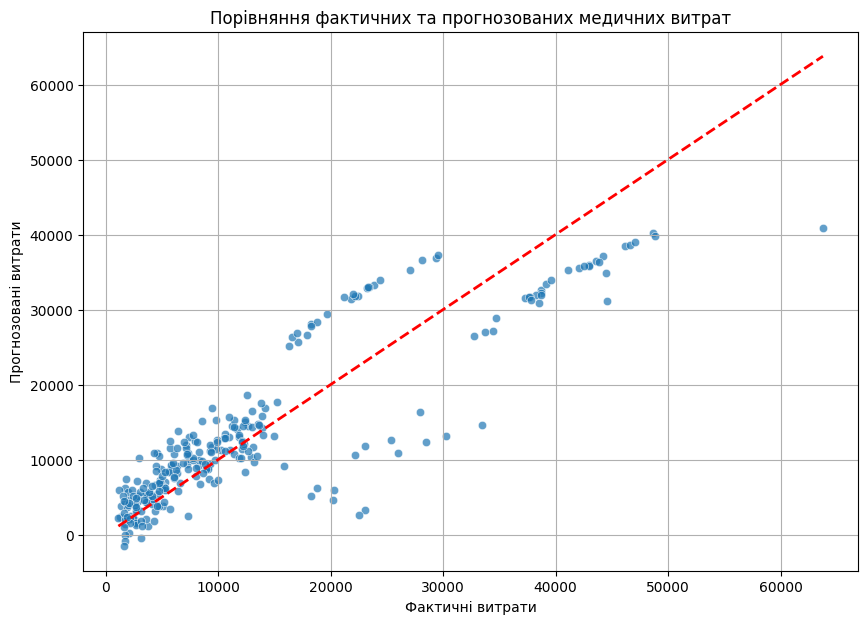

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Крок 1: Завантаження датасету з інтернету
# Використовуємо датасет "Medical Cost Personal Datasets" з GitHub-репозиторію.
DATASET_URL = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

try:
    response = requests.get(DATASET_URL)
    response.raise_for_status()  # Перевірка на HTTP-помилки
    df = pd.read_csv(io.StringIO(response.text))
except requests.exceptions.RequestException as e:
    # Цей блок обробляє помилки мережі або недоступність URL
    # Відповідно до запиту, помилка не виводиться, а програма завершується
    raise SystemExit(f"Помилка завантаження датасету: {e}")
except Exception as e:
    raise SystemExit(f"Невідома помилка при обробці датасету: {e}")

# Крок 2: Підготовка даних
# Лінійна регресія вимагає, щоб усі вхідні дані були числовими.
# Перетворимо категоріальні змінні ('sex', 'smoker', 'region') на числові за допомогою One-Hot Encoding.

# Визначаємо цільову змінну та ознаки
X = df.drop('charges', axis=1)
y = df['charges']

# Визначаємо категоріальні та числові колонки
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Створюємо препроцесор для колонок
# OneHotEncoder перетворить категоріальні ознаки, а 'passthrough' залишить числові без змін.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Залишає інші колонки, якщо вони є (в нашому випадку їх немає)
)

# Крок 3: Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Крок 4: Створення та навчання моделі
# Створюємо пайплайн, який спочатку обробляє дані, а потім навчає модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Навчаємо модель на тренувальних даних
model_pipeline.fit(X_train, y_train)

# Крок 5: Прогнозування на тестових даних
y_pred = model_pipeline.predict(X_test)

# Крок 6: Оцінка моделі (метрики для внутрішнього аналізу)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R-squared: {r2:.2f}")

# Крок 7: Візуалізація результатів
# Для множинної регресії корисно порівняти фактичні та прогнозовані значення.
# Якщо точки лежать близько до діагональної лінії, модель працює добре.
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
# Додаємо лінію ідеального прогнозу (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Порівняння фактичних та прогнозованих медичних витрат')
plt.xlabel('Фактичні витрати')
plt.ylabel('Прогнозовані витрати')
plt.grid(True)
plt.show()

# Додатково: Візуалізація залишків
# Залишки (різниця між фактичними та прогнозованими значеннями) повинні бути
# розподілені випадковим чином навколо нуля.
residuals = y_test - y_pred
# plt.figure(figsize=(10, 7))
# sns.scatterplot(x=y_pred, y=residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.title('Графік залишків')
# plt.xlabel('Прогнозовані значення')
# plt.ylabel('Залишки')
# plt.grid(True)
# plt.show()